In [10]:
!pip install graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

from graphviz import Digraph


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


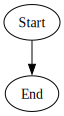

In [11]:
dot = Digraph()
dot.node('A', 'Start')
dot.node('B', 'End')
dot.edge('A', 'B')
dot

In [ ]:
# # // Undirected Unweighted (Task 1)
# graph G {
#     A -- B; A -- C; A -- D;
#     B -- C; B -- E;
#     C -- D; C -- E; C -- F;
#     D -- F; D -- G;
#     E -- F; E -- G;
#     F -- G;
#     A -- G; B -- F; C -- G;
# }

# // Undirected Weighted (Task 2)
# graph G {
#     A -- B [label="2"]; A -- C [label="1"]; A -- D [label="3"];
#     B -- C [label="4"]; B -- E [label="5"];
#     C -- D [label="2"]; C -- E [label="1"]; C -- F [label="3"];
#     D -- F [label="4"]; D -- G [label="2"];
#     E -- F [label="1"]; E -- G [label="3"];
#     F -- G [label="2"];
#     A -- G [label="4"]; B -- F [label="3"]; C -- G [label="1"];
# }

# // Directed Weighted (Task 3)
# digraph G {
#     A -> B [label="2"]; A -> C [label="1"]; A -> D [label="3"];
#     B -> C [label="4"]; B -> E [label="5"];
#     C -> D [label="2"]; C -> E [label="1"]; C -> F [label="3"];
#     D -> F [label="4"]; D -> G [label="2"];
#     E -> F [label="1"]; E -> G [label="3"];
#     F -> G [label="2"];
#     A -> G [label="4"]; B -> F [label="3"]; C -> G [label="1"];
# }

In [12]:
class Graph:
    def __init__(self, vertices, directed=False):
        self.vertices = vertices
        self.size = len(vertices)
        self.directed = directed
        # Initialize adjacency matrix
        self.matrix = [[0 for _ in range(self.size)] for _ in range(self.size)]
        # Initialize adjacency list
        self.adj_list = [[] for _ in range(self.size)]
    
    def add_edge_matrix(self, u, v, weight=1):
        idx_u = self.vertices.index(u)
        idx_v = self.vertices.index(v)
        self.matrix[idx_u][idx_v] = weight
        if not self.directed:
            self.matrix[idx_v][idx_u] = weight
    
    def add_edge_list(self, u, v, weight=1):
        idx_u = self.vertices.index(u)
        idx_v = self.vertices.index(v)
        # Since append is prohibited, we'll create a new list with the added edge
        new_entry = (idx_v, weight)
        new_list = [0] * (len(self.adj_list[idx_u]) + 1)
        for i in range(len(self.adj_list[idx_u])):
            new_list[i] = self.adj_list[idx_u][i]
        new_list[len(self.adj_list[idx_u])] = new_entry
        self.adj_list[idx_u] = new_list
        
        if not self.directed:
            new_entry = (idx_u, weight)
            new_list = [0] * (len(self.adj_list[idx_v]) + 1)
            for i in range(len(self.adj_list[idx_v])):
                new_list[i] = self.adj_list[idx_v][i]
            new_list[len(self.adj_list[idx_v])] = new_entry
            self.adj_list[idx_v] = new_list
    
    # Task 1: Find vertex with maximum degree (undirected, unweighted)
    def max_degree_undirected_matrix(self):
        max_degree = 0
        for i in range(self.size):
            degree = 0
            for j in range(self.size):
                if self.matrix[i][j] != 0:
                    degree += 1
            if degree > max_degree:
                max_degree = degree
        return max_degree
    
    def max_degree_undirected_list(self):
        max_degree = 0
        for i in range(self.size):
            degree = len(self.adj_list[i])
            if degree > max_degree:
                max_degree = degree
        return max_degree
    
    # Task 2: Find vertex with maximum sum of edge weights (undirected, weighted)
    def max_weight_sum_undirected_matrix(self):
        max_sum = 0
        for i in range(self.size):
            current_sum = 0
            for j in range(self.size):
                current_sum += self.matrix[i][j]
            if current_sum > max_sum:
                max_sum = current_sum
        return max_sum
    
    def max_weight_sum_undirected_list(self):
        max_sum = 0
        for i in range(self.size):
            current_sum = 0
            for neighbor in self.adj_list[i]:
                current_sum += neighbor[1]
            if current_sum > max_sum:
                max_sum = current_sum
        return max_sum
    
    # Task 3: Solve Task 1 and 2 for directed graphs (outgoing edges only)
    def max_out_degree_directed_matrix(self):
        max_degree = 0
        for i in range(self.size):
            degree = 0
            for j in range(self.size):
                if self.matrix[i][j] != 0:
                    degree += 1
            if degree > max_degree:
                max_degree = degree
        return max_degree
    
    def max_out_degree_directed_list(self):
        max_degree = 0
        for i in range(self.size):
            degree = len(self.adj_list[i])
            if degree > max_degree:
                max_degree = degree
        return max_degree
    
    def max_out_weight_sum_directed_matrix(self):
        max_sum = 0
        for i in range(self.size):
            current_sum = 0
            for j in range(self.size):
                current_sum += self.matrix[i][j]
            if current_sum > max_sum:
                max_sum = current_sum
        return max_sum
    
    def max_out_weight_sum_directed_list(self):
        max_sum = 0
        for i in range(self.size):
            current_sum = 0
            for neighbor in self.adj_list[i]:
                current_sum += neighbor[1]
            if current_sum > max_sum:
                max_sum = current_sum
        return max_sum
    
    # Task 4: Convert directed weighted graph to undirected weighted graph
    def convert_to_undirected_matrix(self):
        if not self.directed:
            return self.matrix
        
        undirected_matrix = [[0 for _ in range(self.size)] for _ in range(self.size)]
        for i in range(self.size):
            for j in range(self.size):
                if self.matrix[i][j] != 0:
                    undirected_matrix[i][j] = self.matrix[i][j]
                    undirected_matrix[j][i] = self.matrix[i][j]
        return undirected_matrix
    
    def convert_to_undirected_list(self):
        if not self.directed:
            return self.adj_list
        
        undirected_list = [[] for _ in range(self.size)]
        for i in range(self.size):
            # Copy existing outgoing edges
            for neighbor in self.adj_list[i]:
                j, weight = neighbor
                # Add outgoing edge
                new_list = [0] * (len(undirected_list[i]) + 1)
                for k in range(len(undirected_list[i])):
                    new_list[k] = undirected_list[i][k]
                new_list[len(undirected_list[i])] = (j, weight)
                undirected_list[i] = new_list
                # Add reverse edge
                new_list = [0] * (len(undirected_list[j]) + 1)
                for k in range(len(undirected_list[j])):
                    new_list[k] = undirected_list[j][k]
                new_list[len(undirected_list[j])] = (i, weight)
                undirected_list[j] = new_list
        return undirected_list

# Test cases
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Create undirected unweighted graph for Task 1 (using adjacency matrix)
print("Task 1: Undirected Unweighted Graph (Max Degree)")
g1_matrix = Graph(vertices)
g1_matrix.add_edge_matrix('A', 'B')
g1_matrix.add_edge_matrix('A', 'C')
g1_matrix.add_edge_matrix('A', 'D')
g1_matrix.add_edge_matrix('B', 'C')
g1_matrix.add_edge_matrix('B', 'E')
g1_matrix.add_edge_matrix('C', 'D')
g1_matrix.add_edge_matrix('C', 'E')
g1_matrix.add_edge_matrix('C', 'F')
g1_matrix.add_edge_matrix('D', 'F')
g1_matrix.add_edge_matrix('D', 'G')
g1_matrix.add_edge_matrix('E', 'F')
g1_matrix.add_edge_matrix('E', 'G')
g1_matrix.add_edge_matrix('F', 'G')
g1_matrix.add_edge_matrix('A', 'G')
g1_matrix.add_edge_matrix('B', 'F')
g1_matrix.add_edge_matrix('C', 'G')
print("Adjacency Matrix:", g1_matrix.max_degree_undirected_matrix())

g1_list = Graph(vertices)
g1_list.add_edge_list('A', 'B')
g1_list.add_edge_list('A', 'C')
g1_list.add_edge_list('A', 'D')
g1_list.add_edge_list('B', 'C')
g1_list.add_edge_list('B', 'E')
g1_list.add_edge_list('C', 'D')
g1_list.add_edge_list('C', 'E')
g1_list.add_edge_list('C', 'F')
g1_list.add_edge_list('D', 'F')
g1_list.add_edge_list('D', 'G')
g1_list.add_edge_list('E', 'F')
g1_list.add_edge_list('E', 'G')
g1_list.add_edge_list('F', 'G')
g1_list.add_edge_list('A', 'G')
g1_list.add_edge_list('B', 'F')
g1_list.add_edge_list('C', 'G')
print("Adjacency List:", g1_list.max_degree_undirected_list())

# Create undirected weighted graph for Task 2
print("\nTask 2: Undirected Weighted Graph (Max Weight Sum)")
g2_matrix = Graph(vertices)
g2_matrix.add_edge_matrix('A', 'B', 2)
g2_matrix.add_edge_matrix('A', 'C', 1)
g2_matrix.add_edge_matrix('A', 'D', 3)
g2_matrix.add_edge_matrix('B', 'C', 4)
g2_matrix.add_edge_matrix('B', 'E', 5)
g2_matrix.add_edge_matrix('C', 'D', 2)
g2_matrix.add_edge_matrix('C', 'E', 1)
g2_matrix.add_edge_matrix('C', 'F', 3)
g2_matrix.add_edge_matrix('D', 'F', 4)
g2_matrix.add_edge_matrix('D', 'G', 2)
g2_matrix.add_edge_matrix('E', 'F', 1)
g2_matrix.add_edge_matrix('E', 'G', 3)
g2_matrix.add_edge_matrix('F', 'G', 2)
g2_matrix.add_edge_matrix('A', 'G', 4)
g2_matrix.add_edge_matrix('B', 'F', 3)
g2_matrix.add_edge_matrix('C', 'G', 1)
print("Adjacency Matrix:", g2_matrix.max_weight_sum_undirected_matrix())

g2_list = Graph(vertices)
g2_list.add_edge_list('A', 'B', 2)
g2_list.add_edge_list('A', 'C', 1)
g2_list.add_edge_list('A', 'D', 3)
g2_list.add_edge_list('B', 'C', 4)
g2_list.add_edge_list('B', 'E', 5)
g2_list.add_edge_list('C', 'D', 2)
g2_list.add_edge_list('C', 'E', 1)
g2_list.add_edge_list('C', 'F', 3)
g2_list.add_edge_list('D', 'F', 4)
g2_list.add_edge_list('D', 'G', 2)
g2_list.add_edge_list('E', 'F', 1)
g2_list.add_edge_list('E', 'G', 3)
g2_list.add_edge_list('F', 'G', 2)
g2_list.add_edge_list('A', 'G', 4)
g2_list.add_edge_list('B', 'F', 3)
g2_list.add_edge_list('C', 'G', 1)
print("Adjacency List:", g2_list.max_weight_sum_undirected_list())

# Create directed weighted graph for Task 3
print("\nTask 3: Directed Weighted Graph (Outgoing edges only)")
g3_matrix = Graph(vertices, directed=True)
g3_matrix.add_edge_matrix('A', 'B', 2)
g3_matrix.add_edge_matrix('A', 'C', 1)
g3_matrix.add_edge_matrix('A', 'D', 3)
g3_matrix.add_edge_matrix('B', 'C', 4)
g3_matrix.add_edge_matrix('B', 'E', 5)
g3_matrix.add_edge_matrix('C', 'D', 2)
g3_matrix.add_edge_matrix('C', 'E', 1)
g3_matrix.add_edge_matrix('C', 'F', 3)
g3_matrix.add_edge_matrix('D', 'F', 4)
g3_matrix.add_edge_matrix('D', 'G', 2)
g3_matrix.add_edge_matrix('E', 'F', 1)
g3_matrix.add_edge_matrix('E', 'G', 3)
g3_matrix.add_edge_matrix('F', 'G', 2)
g3_matrix.add_edge_matrix('A', 'G', 4)
g3_matrix.add_edge_matrix('B', 'F', 3)
g3_matrix.add_edge_matrix('C', 'G', 1)
print("Max Out Degree (Matrix):", g3_matrix.max_out_degree_directed_matrix())
print("Max Out Weight Sum (Matrix):", g3_matrix.max_out_weight_sum_directed_matrix())

g3_list = Graph(vertices, directed=True)
g3_list.add_edge_list('A', 'B', 2)
g3_list.add_edge_list('A', 'C', 1)
g3_list.add_edge_list('A', 'D', 3)
g3_list.add_edge_list('B', 'C', 4)
g3_list.add_edge_list('B', 'E', 5)
g3_list.add_edge_list('C', 'D', 2)
g3_list.add_edge_list('C', 'E', 1)
g3_list.add_edge_list('C', 'F', 3)
g3_list.add_edge_list('D', 'F', 4)
g3_list.add_edge_list('D', 'G', 2)
g3_list.add_edge_list('E', 'F', 1)
g3_list.add_edge_list('E', 'G', 3)
g3_list.add_edge_list('F', 'G', 2)
g3_list.add_edge_list('A', 'G', 4)
g3_list.add_edge_list('B', 'F', 3)
g3_list.add_edge_list('C', 'G', 1)
print("Max Out Degree (List):", g3_list.max_out_degree_directed_list())
print("Max Out Weight Sum (List):", g3_list.max_out_weight_sum_directed_list())

# Task 4: Convert directed to undirected
print("\nTask 4: Convert Directed to Undirected")
print("Original Directed Adjacency Matrix:")
for row in g3_matrix.matrix:
    print(row)
undirected_matrix = g3_matrix.convert_to_undirected_matrix()
print("\nConverted Undirected Adjacency Matrix:")
for row in undirected_matrix:
    print(row)

print("\nOriginal Directed Adjacency List:")
for i, neighbors in enumerate(g3_list.adj_list):
    print(f"{vertices[i]}: {neighbors}")
undirected_list = g3_list.convert_to_undirected_list()
print("\nConverted Undirected Adjacency List:")
for i, neighbors in enumerate(undirected_list):
    print(f"{vertices[i]}: {neighbors}")

Task 1: Undirected Unweighted Graph (Max Degree)
Adjacency Matrix: 6
Adjacency List: 6

Task 2: Undirected Weighted Graph (Max Weight Sum)
Adjacency Matrix: 14
Adjacency List: 14

Task 3: Directed Weighted Graph (Outgoing edges only)
Max Out Degree (Matrix): 4
Max Out Weight Sum (Matrix): 12
Max Out Degree (List): 4
Max Out Weight Sum (List): 12

Task 4: Convert Directed to Undirected
Original Directed Adjacency Matrix:
[0, 2, 1, 3, 0, 0, 4]
[0, 0, 4, 0, 5, 3, 0]
[0, 0, 0, 2, 1, 3, 1]
[0, 0, 0, 0, 0, 4, 2]
[0, 0, 0, 0, 0, 1, 3]
[0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0]

Converted Undirected Adjacency Matrix:
[0, 2, 1, 3, 0, 0, 4]
[2, 0, 4, 0, 5, 3, 0]
[1, 4, 0, 2, 1, 3, 1]
[3, 0, 2, 0, 0, 4, 2]
[0, 5, 1, 0, 0, 1, 3]
[0, 3, 3, 4, 1, 0, 2]
[4, 0, 1, 2, 3, 2, 0]

Original Directed Adjacency List:
A: [(1, 2), (2, 1), (3, 3), (6, 4)]
B: [(2, 4), (4, 5), (5, 3)]
C: [(3, 2), (4, 1), (5, 3), (6, 1)]
D: [(5, 4), (6, 2)]
E: [(5, 1), (6, 3)]
F: [(6, 2)]
G: []

Converted Undirected Adjacency Lis

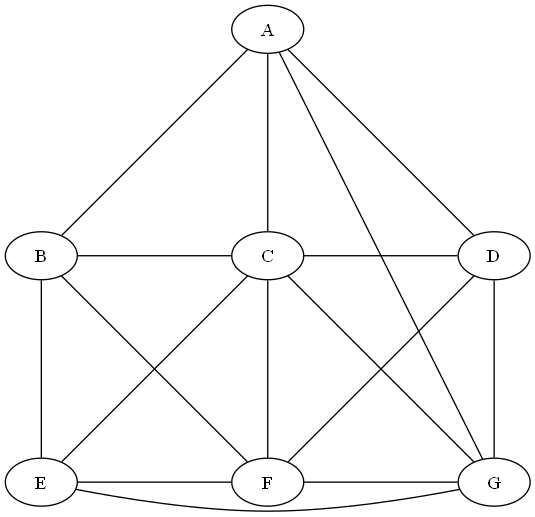

In [16]:
# %% [markdown]
# # Graph Visualization Lab (Fixed Version)
# 
# This notebook demonstrates all four graph tasks using Graphviz visualizations with corrected attribute setting.

# %%
from graphviz import Graph, Digraph
import IPython

# %% [markdown]
# ## Task 1: Undirected Unweighted Graph (Max Degree)

# %%
def create_task1_graph():
    g = Graph('G', filename='task1.gv', engine='neato')
    g.attr(overlap='false', splines='true')
    
    # Add nodes with positions
    g.node('A', pos='0,1!')
    g.node('B', pos='-1,0!')
    g.node('C', pos='0,0!')
    g.node('D', pos='1,0!')
    g.node('E', pos='-1,-1!')
    g.node('F', pos='0,-1!')
    g.node('G', pos='1,-1!')
    
    # Add all 16 edges
    g.edges(['AB', 'AC', 'AD', 'BC', 'BE', 'CD', 'CE', 'CF', 
             'DF', 'DG', 'EF', 'EG', 'FG', 'AG', 'BF', 'CG'])
    
    # Set attributes correctly
    g.attr('node', shape='circle', style='filled', fillcolor='lightblue')
    g.attr('edge', penwidth='2')
    return g

task1_graph = create_task1_graph()
IPython.display.Image(task1_graph.render(format='png'))


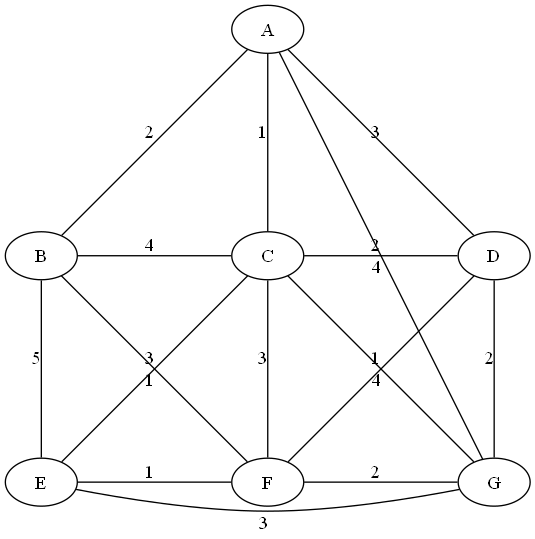

In [17]:
# ## Task 2: Undirected Weighted Graph (Max Weight Sum)

# %%
def create_task2_graph():
    g = Graph('G', filename='task2.gv', engine='neato')
    g.attr(overlap='false', splines='true')
    
    # Add nodes with positions
    g.node('A', pos='0,1!')
    g.node('B', pos='-1,0!')
    g.node('C', pos='0,0!')
    g.node('D', pos='1,0!')
    g.node('E', pos='-1,-1!')
    g.node('F', pos='0,-1!')
    g.node('G', pos='1,-1!')
    
    # Add weighted edges
    g.edge('A', 'B', label='2')
    g.edge('A', 'C', label='1')
    g.edge('A', 'D', label='3')
    g.edge('B', 'C', label='4')
    g.edge('B', 'E', label='5')
    g.edge('C', 'D', label='2')
    g.edge('C', 'E', label='1')
    g.edge('C', 'F', label='3')
    g.edge('D', 'F', label='4')
    g.edge('D', 'G', label='2')
    g.edge('E', 'F', label='1')
    g.edge('E', 'G', label='3')
    g.edge('F', 'G', label='2')
    g.edge('A', 'G', label='4')
    g.edge('B', 'F', label='3')
    g.edge('C', 'G', label='1')
    
    # Set attributes correctly
    g.attr('node', shape='circle', style='filled', fillcolor='lightgreen')
    g.attr('edge', penwidth='2', fontsize='10')
    return g

task2_graph = create_task2_graph()
IPython.display.Image(task2_graph.render(format='png'))

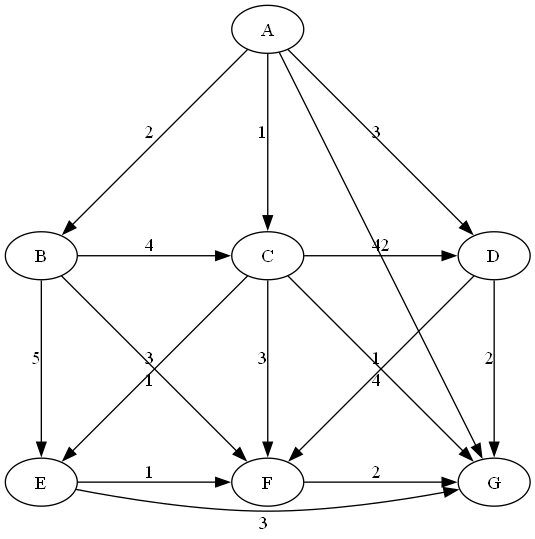

In [18]:
# ## Task 3: Directed Weighted Graph (Outgoing Edges Only)

# %%
def create_task3_graph():
    g = Digraph('G', filename='task3.gv', engine='neato')
    g.attr(overlap='false', splines='true')
    
    # Add nodes with positions
    g.node('A', pos='0,1!')
    g.node('B', pos='-1,0!')
    g.node('C', pos='0,0!')
    g.node('D', pos='1,0!')
    g.node('E', pos='-1,-1!')
    g.node('F', pos='0,-1!')
    g.node('G', pos='1,-1!')
    
    # Add directed weighted edges
    g.edge('A', 'B', label='2')
    g.edge('A', 'C', label='1')
    g.edge('A', 'D', label='3')
    g.edge('B', 'C', label='4')
    g.edge('B', 'E', label='5')
    g.edge('C', 'D', label='2')
    g.edge('C', 'E', label='1')
    g.edge('C', 'F', label='3')
    g.edge('D', 'F', label='4')
    g.edge('D', 'G', label='2')
    g.edge('E', 'F', label='1')
    g.edge('E', 'G', label='3')
    g.edge('F', 'G', label='2')
    g.edge('A', 'G', label='4')
    g.edge('B', 'F', label='3')
    g.edge('C', 'G', label='1')
    
    # Set attributes correctly
    g.attr('node', shape='circle', style='filled', fillcolor='salmon')
    g.attr('edge', penwidth='2', fontsize='10', arrowsize='0.7')
    return g

task3_graph = create_task3_graph()
IPython.display.Image(task3_graph.render(format='png'))

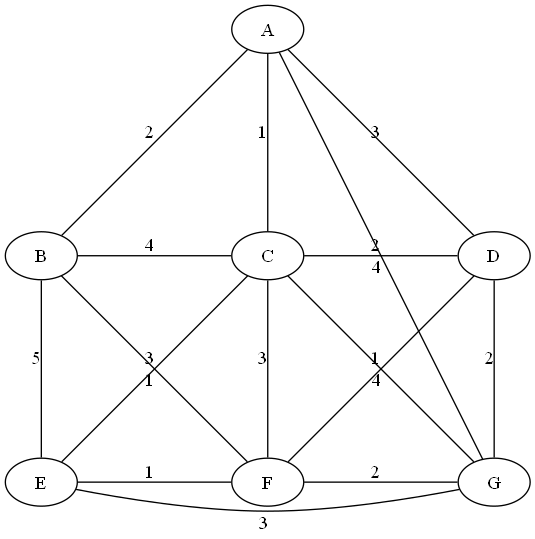

In [19]:
# ## Task 4: Converted Undirected Weighted Graph

# %%
def create_task4_graph():
    g = Graph('G', filename='task4.gv', engine='neato')
    g.attr(overlap='false', splines='true')
    
    # Add nodes with positions
    g.node('A', pos='0,1!')
    g.node('B', pos='-1,0!')
    g.node('C', pos='0,0!')
    g.node('D', pos='1,0!')
    g.node('E', pos='-1,-1!')
    g.node('F', pos='0,-1!')
    g.node('G', pos='1,-1!')
    
    # Add weighted edges (now undirected)
    g.edge('A', 'B', label='2')
    g.edge('A', 'C', label='1')
    g.edge('A', 'D', label='3')
    g.edge('B', 'C', label='4')
    g.edge('B', 'E', label='5')
    g.edge('C', 'D', label='2')
    g.edge('C', 'E', label='1')
    g.edge('C', 'F', label='3')
    g.edge('D', 'F', label='4')
    g.edge('D', 'G', label='2')
    g.edge('E', 'F', label='1')
    g.edge('E', 'G', label='3')
    g.edge('F', 'G', label='2')
    g.edge('A', 'G', label='4')
    g.edge('B', 'F', label='3')
    g.edge('C', 'G', label='1')
    
    # Set attributes correctly
    g.attr('node', shape='circle', style='filled', fillcolor='lightyellow')
    g.attr('edge', penwidth='2', fontsize='10', color='darkgreen')
    return g

task4_graph = create_task4_graph()
IPython.display.Image(task4_graph.render(format='png'))

In [20]:
from graphviz import Graph, Digraph

# Create visualization functions for each graph type
def visualize_undirected_unweighted(vertices, edges):
    g = Graph('G', filename='undirected_unweighted.gv', engine='neato')
    g.attr(overlap='false', splines='true', label='Undirected Unweighted Graph (Task 1)')
    
    # Add nodes with positions
    positions = {
        'A': '0,1!', 'B': '-1,0!', 'C': '0,0!',
        'D': '1,0!', 'E': '-1,-1!', 'F': '0,-1!', 'G': '1,-1!'
    }
    for v in vertices:
        g.node(v, pos=positions[v])
    
    # Add edges
    for u, v in edges:
        g.edge(u, v)
    
    g.attr('node', shape='circle', style='filled', fillcolor='lightblue')
    return g

def visualize_undirected_weighted(vertices, edges):
    g = Graph('G', filename='undirected_weighted.gv', engine='neato')
    g.attr(overlap='false', splines='true', label='Undirected Weighted Graph (Task 2)')
    
    positions = {
        'A': '0,1!', 'B': '-1,0!', 'C': '0,0!',
        'D': '1,0!', 'E': '-1,-1!', 'F': '0,-1!', 'G': '1,-1!'
    }
    for v in vertices:
        g.node(v, pos=positions[v])
    
    for u, v, w in edges:
        g.edge(u, v, label=str(w))
    
    g.attr('node', shape='circle', style='filled', fillcolor='lightgreen')
    g.attr('edge', fontsize='10')
    return g

def visualize_directed_weighted(vertices, edges):
    g = Digraph('G', filename='directed_weighted.gv', engine='neato')
    g.attr(overlap='false', splines='true', label='Directed Weighted Graph (Task 3)')
    
    positions = {
        'A': '0,1!', 'B': '-1,0!', 'C': '0,0!',
        'D': '1,0!', 'E': '-1,-1!', 'F': '0,-1!', 'G': '1,-1!'
    }
    for v in vertices:
        g.node(v, pos=positions[v])
    
    for u, v, w in edges:
        g.edge(u, v, label=str(w))
    
    g.attr('node', shape='circle', style='filled', fillcolor='salmon')
    g.attr('edge', fontsize='10', arrowsize='0.7')
    return g

# Define the graph structure based on your test cases
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Undirected unweighted edges (Task 1)
edges_unweighted = [
    ('A','B'), ('A','C'), ('A','D'), ('B','C'), ('B','E'),
    ('C','D'), ('C','E'), ('C','F'), ('D','F'), ('D','G'),
    ('E','F'), ('E','G'), ('F','G'), ('A','G'), ('B','F'), ('C','G')
]

# Undirected weighted edges (Task 2)
edges_weighted = [
    ('A','B',2), ('A','C',1), ('A','D',3), ('B','C',4), ('B','E',5),
    ('C','D',2), ('C','E',1), ('C','F',3), ('D','F',4), ('D','G',2),
    ('E','F',1), ('E','G',3), ('F','G',2), ('A','G',4), ('B','F',3), ('C','G',1)
]

# Generate and render the visualizations
g1 = visualize_undirected_unweighted(vertices, edges_unweighted)
g1.render(view=True)

g2 = visualize_undirected_weighted(vertices, edges_weighted)
g2.render(view=True)

g3 = visualize_directed_weighted(vertices, edges_weighted)
g3.render(view=True)

# For Task 4 (converted undirected), we can reuse the weighted visualization
print("\nTask 4 visualization would be identical to Task 2's graph")


Task 4 visualization would be identical to Task 2's graph
